In [1]:
import pandas as pd
import numpy as np


# Import Dataset

In [2]:
dataset_xls_1 = pd.read_excel('./Dataset/sales-(2020).xlsx')
dataset_xls_2 = pd.read_excel('./Dataset/sales-(2021).xlsx')
dataset_xls_3 = pd.read_excel('./Dataset/sales-(2022).xlsx')
dataset_xls_4 = pd.read_excel('./Dataset/sales-(2023).xlsx')

# combine all dataset_xls into one dataframe
dataset = pd.concat([dataset_xls_1, dataset_xls_2,
                    dataset_xls_3, dataset_xls_4], ignore_index=True)


In [3]:
dataset

username    no-pesanan tanggal-pesanan  \
0         surya251196   201104NURT3      2020-05-03   
1     captain.marline   201104DSB34      2020-05-03   
2       ridhayashinta  201104JHVJ45      2020-05-03   
3    nurulismawati103   201104VGRX4      2020-05-03   
4       nabilahauraaa   201104XSAEF      2020-05-04   
..                ...           ...             ...   
395          gusnajib   231003AQW34      2023-04-06   
396      shella_naura   231003FVG77      2023-04-06   
397     aldokristanto   231003NBV59      2023-04-06   
398      nurulrhmynti   231003MNB10      2023-04-07   
399        diktahuaku   231003TRE09      2023-04-07   

                                           nama-barang  jumlah  dibayar  \
0    NIBRAS SARIMBIT LAIKA BLACK, NIBRAS SARIMBIT E...       2   230000   
1    NIBRAS SARIMBIT LAIKA BLACK, NIBRAS NBC 20 GAM...       2   230000   
2      NIBRAS SARIMBIT LAIKA BLACK, NIBRAS KOKO NK 101       2   230000   
3    NIBRAS KOKO NSK 89 DAN GAMIS NB A89, NIBRAS KO...       2   230000   
4    NIBRAS KOKO NSK 89 DAN GAMIS NB A90, NIBRAS CO...       2   230000   
..                                                 ...     ...      ...   
395  NIBRAS SARIMBIT 70 COKLAT, NIBRAS SARIMBIT CAR...       2   230000   
396  NIBRAS SARIMBIT 70 COKLAT, NIBRAS SARIMBIT CHE...       2   230000   
397  NIBRAS SARIMBIT 70 COKLAT, NIBRAS KOKO POLOS N...       2   230000   
398    NIBRAS SARIMBIT 70 COKLAT, NIBRAS GAMIS NB B108       2   230000   
399  NIBRAS SARIMBIT 70 COKLAT, NIBRAS SARIMBIT LAI...       2   230000   

    payment-method  
0              COD  
1              COD  
2              COD  
3              COD  
4        Pay Later  
..             ...  
395            COD  
396            COD  
397      Pay Later  
398            COD  
399            COD  

[400 rows x 7 columns]

# Preprocessing Data

In [28]:
import datetime as dt


## Tokenize nama barang

In [4]:
dataset['nama-barang'] = dataset['nama-barang'].str.split(', ')
dataset['nama-barang'] = dataset['nama-barang'].apply(
    lambda x: [item.strip() for item in x])


## Split nama-barang items

In [6]:
dataset_replicated = dataset.explode('nama-barang').reset_index(drop=True)
dataset_replicated['nama-barang'] = dataset_replicated['nama-barang'].str.lower()

dataset_replicated.info

username    no-pesanan tanggal-pesanan  \
0        surya251196   201104NURT3      2020-05-03   
1        surya251196   201104NURT3      2020-05-03   
2    captain.marline   201104DSB34      2020-05-03   
3    captain.marline   201104DSB34      2020-05-03   
4      ridhayashinta  201104JHVJ45      2020-05-03   
..               ...           ...             ...   
632    aldokristanto   231003NBV59      2023-04-06   
633     nurulrhmynti   231003MNB10      2023-04-07   
634     nurulrhmynti   231003MNB10      2023-04-07   
635       diktahuaku   231003TRE09      2023-04-07   
636       diktahuaku   231003TRE09      2023-04-07   

                                   nama-barang  jumlah  dibayar payment-method  
0                  nibras sarimbit laika black       2   230000            COD  
1                  nibras sarimbit estela navy       2   230000            COD  
2                  nibras sarimbit laika black       2   230000            COD  
3    nibras nbc 20 gamis putih dan hitam polos       2   230000            COD  
4                  nibras sarimbit laika black       2   230000            COD  
..                                         ...     ...      ...            ...  
632                    nibras koko polos nk 83       2   230000      Pay Later  
633                  nibras sarimbit 70 coklat       2   230000            COD  
634                       nibras gamis nb b108       2   230000            COD  
635                  nibras sarimbit 70 coklat       2   230000            COD  
636                nibras sarimbit laika black       2   230000            COD  

[637 rows x 7 columns]

In [8]:
print(dataset_replicated.info())
print(dataset_replicated.shape)
print(dataset_replicated.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   username         637 non-null    object        
 1   no-pesanan       637 non-null    object        
 2   tanggal-pesanan  637 non-null    datetime64[ns]
 3   nama-barang      637 non-null    object        
 4   jumlah           637 non-null    int64         
 5   dibayar          637 non-null    int64         
 6   payment-method   637 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 35.0+ KB
None
(637, 7)
username           0
no-pesanan         0
tanggal-pesanan    0
nama-barang        0
jumlah             0
dibayar            0
payment-method     0
dtype: int64


## RFM (Recency, Frequency, Monetary)

In [14]:
# Monetary
rfm_dataset_monetary = dataset_replicated.groupby('username')['dibayar'].sum()

In [47]:
rfm_dataset_monetary = pd.DataFrame(rfm_dataset_monetary)
rfm_dataset_monetary.columns = ['amount']
rfm_dataset_monetary


amount
username            
009kamal      460000
2uv9jxkjgs    150000
5ckqbsnqf3    920000
_alhaq_       920000
_byduri87     920000
...              ...
yyumtlvuvk    150000
zahraserlika  150000
zilkafeb      150000
zul_zul_cuy   150000
zyza83        460000

[346 rows x 1 columns]

In [44]:
# Frequency
rfm_dataset_frequency = dataset_replicated.groupby('username')[
    'username'].count()

# change column name to frequency
rfm_dataset_frequency = pd.DataFrame(
    rfm_dataset_frequency)

rfm_dataset_frequency.columns = ['frequency']
rfm_dataset_frequency


frequency
username               
009kamal              2
2uv9jxkjgs            1
5ckqbsnqf3            4
_alhaq_               4
_byduri87             4
...                 ...
yyumtlvuvk            1
zahraserlika          1
zilkafeb              1
zul_zul_cuy           1
zyza83                2

[346 rows x 1 columns]

In [25]:
# Recency
dataset_replicated['tanggal-pesanan'] = pd.to_datetime(
    dataset_replicated['tanggal-pesanan'], format='%d-%m-%Y %H:%M')

max_date = max(dataset_replicated['tanggal-pesanan'])
dataset_replicated['Diff'] = max_date - dataset_replicated['tanggal-pesanan']


In [36]:
rfm_dataset_recency = dataset_replicated.groupby('username')['Diff'].min()
rfm_dataset_recency.reset_index()
rfm_dataset_recency = pd.DataFrame(rfm_dataset_recency)
rfm_dataset_recency['Diff'] = rfm_dataset_recency['Diff'].dt.days
rfm_dataset_recency

Diff
username          
009kamal       710
2uv9jxkjgs     355
5ckqbsnqf3     366
_alhaq_          7
_byduri87      365
...            ...
yyumtlvuvk    1067
zahraserlika     5
zilkafeb       712
zul_zul_cuy    354
zyza83         716

[346 rows x 1 columns]

In [55]:
# Merge RFM 
rfm_final = pd.merge(rfm_dataset_recency, rfm_dataset_frequency, on='username', how='inner')
rfm_final = pd.merge(rfm_final, rfm_dataset_monetary, on='username', how='inner')

rfm_final['username'] = rfm_final.index
rfm_final = rfm_final.reset_index(drop=True)

cols = list(rfm_final.columns)
cols = [cols[-1]] + cols[:-1]
rfm_final = rfm_final[cols]


rfm_final.columns = ['Username', 'Amount', 'Frequency', 'Recency']
rfm_final

Username  Amount  Frequency  Recency
0        009kamal     710          2   460000
1      2uv9jxkjgs     355          1   150000
2      5ckqbsnqf3     366          4   920000
3         _alhaq_       7          4   920000
4       _byduri87     365          4   920000
..            ...     ...        ...      ...
341    yyumtlvuvk    1067          1   150000
342  zahraserlika       5          1   150000
343      zilkafeb     712          1   150000
344   zul_zul_cuy     354          1   150000
345        zyza83     716          2   460000

[346 rows x 4 columns]

## Outlier Filtering

In [65]:
Q1 = rfm_final.Amount.quantile(0.05)
Q3 = rfm_final.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm_final = rfm_final[(rfm_final.Amount >= (Q1 - 1.5*IQR))
                      & (rfm_final.Amount <= (Q3 + 1.5 * IQR))]


In [66]:
Q1 = rfm_final.Recency.quantile(0.05)
Q3 = rfm_final.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_final = rfm_final[(
    rfm_final.Recency >= Q1 - 1.5*IQR) & (rfm_final.Recency <= Q3 + 1.5*IQR)]


In [67]:
Q1 = rfm_final.Frequency.quantile(0.05)
Q3 = rfm_final.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_final = rfm_final[(
    rfm_final.Frequency >= Q1 - 1.5*IQR) & (rfm_final.Frequency <= Q3 + 1.5*IQR)]


In [68]:
print(rfm_final.shape)


(346, 4)


## Scaling - Min Max Scaler

In [64]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np

In [69]:
x = rfm_final[['Amount', 'Frequency', 'Recency']]
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(x)

In [71]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_scaled

Amount  Frequency  Recency
0    0.661080       0.25     0.31
1    0.330540       0.00     0.00
2    0.340782       0.75     0.77
3    0.006518       0.75     0.77
4    0.339851       0.75     0.77
..        ...        ...      ...
341  0.993482       0.00     0.00
342  0.004655       0.00     0.00
343  0.662942       0.00     0.00
344  0.329609       0.00     0.00
345  0.666667       0.25     0.31

[346 rows x 3 columns]

# Model Creation

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [73]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_scaled)
lbs = kmeans.labels_
print(lbs)

[1 2 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 1 1 1 2 1 1 1 1 2 2 1 0 0 1 1
 1 0 1 1 1 1 1 2 1 1 1 1 2 0 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2 1 2 1 2 1 1 1 2
 2 0 1 2 2 1 2 1 2 1 1 1 1 2 1 2 2 2 0 1 2 1 1 1 1 1 1 2 1 1 1 0 1 2 2 1 2
 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 0 1 1 2 1 1 1 1 2 1 2 2 2 2 1 0 1 1 2 1 2
 2 2 1 2 2 1 2 1 2 1 1 2 1 1 2 1 1 1 2 2 2 1 1 1 2 2 0 1 2 2 1 2 0 1 0 1 1
 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 0 1 2 2 1 1 1 1 1 1 1 2 2 1
 2 1 2 1 0 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2 1 0 1 0 1 1 2 2 2 1 2
 1 0 0 2 1 0 1 2 2 2 1 2 1 1 1 1 0 2 1 1 2 2 1 2 0 2 2 1 2 2 1 2 1 1 1 1 1
 0 1 0 0 2 1 1 2 1 0 1 1 1 1 1 0 2 2 1 2 0 1 2 2 1 2 1 1 2 2 2 2 1 1 1 1 2
 2 1 2 2 1 1 1 1 1 2 1 2 1]


# Model Analysis

## WSS (Within-Cluster Sum of Square) with Elbow Curve

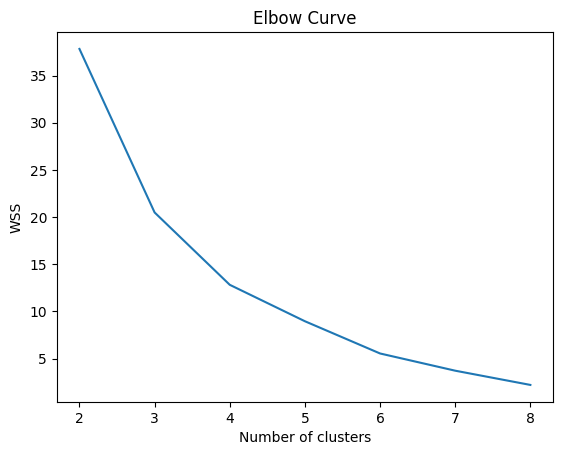

In [74]:
wss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, max_iter=50)
    kmeans.fit(rfm_scaled)
    labels = kmeans.labels_
    wss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range_n_clusters, wss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()


## Silhouette Score Analysis

Score shilhouette antara -1 sampai 1. Semakin tinggi nilainya, semakin baik modelnya.

- Semakin dekat dengan 1, artinya data point di dalam cluster semakin dekat dengan data point di cluster lain.
- Semakin dekat dengan -1, artinya data point tidak sama dengan data point di cluster yang sama

In [77]:
# silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(
        num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.4976614675348625
For n_clusters=3, the silhouette score is 0.5641087778885784
For n_clusters=4, the silhouette score is 0.6068878719681005
For n_clusters=5, the silhouette score is 0.6379351499392372
For n_clusters=6, the silhouette score is 0.7544484367480596
For n_clusters=7, the silhouette score is 0.8156447925721442
For n_clusters=8, the silhouette score is 0.878996472347028


# Model Result

In [79]:
rfm_final['Cluster_Id'] = lbs
rfm_final

Username  Amount  Frequency  Recency  Cluster_Id
0        009kamal     710          2   460000           1
1      2uv9jxkjgs     355          1   150000           2
2      5ckqbsnqf3     366          4   920000           0
3         _alhaq_       7          4   920000           0
4       _byduri87     365          4   920000           0
..            ...     ...        ...      ...         ...
341    yyumtlvuvk    1067          1   150000           1
342  zahraserlika       5          1   150000           2
343      zilkafeb     712          1   150000           1
344   zul_zul_cuy     354          1   150000           2
345        zyza83     716          2   460000           1

[346 rows x 5 columns]

# Plotting

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns

In [85]:
rfm_final

Username  Amount  Frequency  Recency  Cluster_Id
0        009kamal     710          2   460000           1
1      2uv9jxkjgs     355          1   150000           2
2      5ckqbsnqf3     366          4   920000           0
3         _alhaq_       7          4   920000           0
4       _byduri87     365          4   920000           0
..            ...     ...        ...      ...         ...
341    yyumtlvuvk    1067          1   150000           1
342  zahraserlika       5          1   150000           2
343      zilkafeb     712          1   150000           1
344   zul_zul_cuy     354          1   150000           2
345        zyza83     716          2   460000           1

[346 rows x 5 columns]

## Box Plot

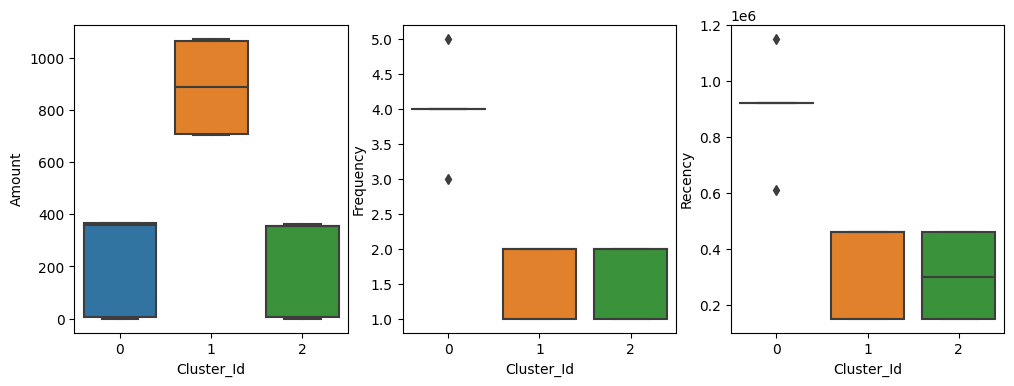

In [84]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm_final)
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_final)
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_final)
plt.show()


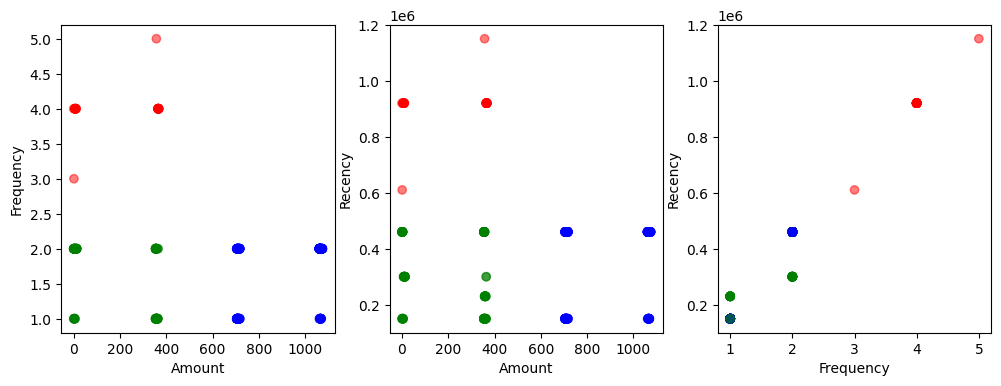

In [91]:
colors = ['red', 'blue', 'green']
rfm_final_plot = rfm_final.copy()
rfm_final_plot['Color'] = rfm_final_plot['Cluster_Id'].map(lambda p: colors[p])

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
# create scatter plot for amount and frequency based on cluster id and color the data points
plt.scatter(rfm_final_plot['Amount'], rfm_final_plot['Frequency'],
            c=rfm_final_plot['Color'], alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
# create scatter plot for amount and recency based on cluster id and color the data points
plt.scatter(rfm_final_plot['Amount'], rfm_final_plot['Recency'],
            c=rfm_final_plot['Color'], alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('Recency')
plt.subplot(1, 3, 3)
# create scatter plot for frequency and recency based on cluster id and color the data points
plt.scatter(rfm_final_plot['Frequency'], rfm_final_plot['Recency'],
            c=rfm_final_plot['Color'], alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.show()



